# Machine Learning and Intelligent Data Analysis: Summative Assignment One
# Palvinder Sander - 1992325

# Background 
The data you have been given represents the daily takings of a new small business during its first $100$ days of operation. The two variables are:

* $x$: day number
* $t$: daily takings (in units of £$1000$)

Variable $t$ can be taken to be generated by $t_{i}=h(x_{i})+\epsilon$ with $\epsilon \sim N(0,\sigma^{2})$ and $\sigma=0.1$. The function $h(x)$ is unknown.

The data is recorded every five days (days $1$, $6$, $11$ etc) and is the sum of the previous five days takings. Unfortunately, some of the data is missing, with recordings from days $31$, $36$, $41$, $46$, $51$, and $56$ missing because of a failure of the business's IT system and lack of a backup. This data is needed for accounting purposes.

Text(0, 0.5, 't')

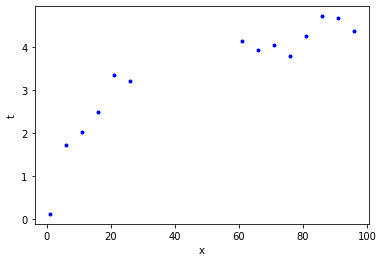

In [1]:
# Data loader - DO NOT MODIFY
# x and t are 2d arrays of shape (N,1) where N is the number of data points

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('assignment1.csv').to_numpy()
x = df[:, 1].reshape((-1, 1))
t = df[:, 2].reshape((-1, 1))

plt.figure()
plt.plot(x, t, 'b.')
plt.xlabel('x')
plt.ylabel('t')

# Question One:

Use 3-fold cross-validation to select an optimal polynomial model using least squares estimation without regularization. In the notebook:

1. 
    State the optimal degree of polynomial and print its parameters accurate to three decimal places.

2. 
    Plot the fitted line and comment on whether it appears to represent the data well. Do you think it will generalise well to unseen data?

3. 
    State clearly your estimates of t for the missing values of x

Order & Train RMS & Valid RMS 
0 & 1.289 & 1.393 & Total 2.682
1 & 0.571 & 0.797 & Total 1.368
2 & 0.397 & 0.784 & Total 1.181
3 & 0.149 & 0.529 & Total 0.678
4 & 0.114 & 0.626 & Total 0.739
5 & 0.064 & 0.817 & Total 0.882
6 & 0.000 & 1.297 & Total 1.297
Min Order: 3 (0.678)


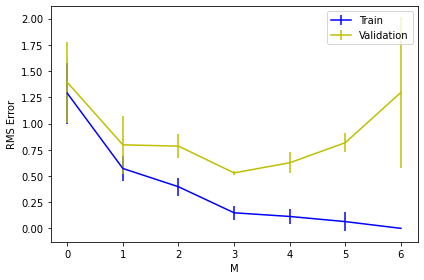

In [2]:
# Points: 0  1  2  3  4  5  6  7  8  9 10 11 12 13
# Split:  V  V  T  V  V  T  V  V  T  V  V  T  V  V   where V : used in training validation and T : used in testing

# For result reproducability
np.random.seed(1234)

# The combined data for cross-validation: 10pts
xtrainval = np.concatenate((x.flatten()[0::3], x.flatten()[1::3]), axis=0)
ttrainval = np.concatenate((t.flatten()[0::3], t.flatten()[1::3]), axis=0)

# The test set: 4pts
xtest = x[2::3].flatten()
ttest = t[2::3].flatten()

# First, combine the x and t data into a single array
trainval = np.concatenate([np.atleast_2d(xtrainval).T, np.atleast_2d(ttrainval).T], axis=1)

# Randomise the order
trainval = np.random.permutation(trainval)

# Split the dataset, remembering that we randomised the order of the data points. We'll split into K=3 folds.
Folds = [trainval[0:3], trainval[3:7], trainval[7:]]

# Max polynomial order set to 7 because the training
M = [0, 1, 2, 3, 4, 5, 6]

# Number of folds
K = 3

rmstrain = []  # Error on the training folds
rmsvalid = []  # RMS error on the validation fold
stdtrain = []  # Standard deviation over the training sets
stdvalid = []  # Standard deviation over the validation sets

for i in M:

    # Record the performance on the folds
    train_loss = []
    validation_loss = []

    for j in range(K):

        # Select the one validation fold
        Valid = Folds[j]

        # Select and combine the K-1 training folds
        Train = np.concatenate(Folds[:j]+Folds[j+1:])

        # Compute the basis matrix for the training and validation folds
        PhiTrain = np.array([pow(Train[:, 0], j) for j in range(0, i+1)]).transpose()
        PhiValid = np.array([pow(Valid[:, 0], j) for j in range(0, i+1)]).transpose()

        # Train the model
        w = np.linalg.solve(np.matmul(PhiTrain.transpose(), PhiTrain), np.matmul(PhiTrain.transpose(), Train[:, 1]))

        # Compute the error on the training set
        train_loss.append(np.sqrt(np.average(pow(Train[:, 1]-np.matmul(PhiTrain, w), 2))))

        # Compute the error on the validation set
        validation_loss.append(np.sqrt(np.average(pow(Valid[:, 1]-np.matmul(PhiValid, w), 2))))

    # Record the average over the folds
    rmstrain.append(np.average(train_loss))
    rmsvalid.append(np.average(validation_loss))
    stdtrain.append(np.std(train_loss))
    stdvalid.append(np.std(validation_loss))

# Plot RMS Error for each Polynomial order
plt.figure()
plt.errorbar(M, rmstrain, fmt='b-', yerr=stdtrain, label="Train")
plt.errorbar(M, rmsvalid, fmt='y-', yerr=stdvalid, label="Validation")
plt.xlabel('M')
plt.ylabel('RMS Error')
plt.legend()
plt.tight_layout()

# Output metrics and best polynomial order
print("Order & Train RMS & Valid RMS ")
minOrder = 0
minTotal = float('inf')
for i in M:
    if rmstrain[i] + rmsvalid[i] < minTotal:
        minTotal = rmstrain[i] + rmsvalid[i]
        minOrder = i
    print(
        f"{i:d} & {rmstrain[i]:.3f} & {rmsvalid[i]:.3f} & Total {(rmstrain[i] + rmsvalid[i]):.3f}")
print(f"Min Order: {minOrder} ({minTotal:.3f})")

Training loss = 0.24
Test loss = 0.34

Weight W0: 0.15163426198537774
Weight W1: 0.21627136501189054
Weight W2: -0.003743900264515951
Weight W3: 2.0622113515072508e-05

Day 1.0: 0.36418234884626743
Day 6.0: 1.3189364190534023
Day 11.0: 2.105055378198305
Day 16.0: 2.7380058114172803
Day 21.0: 3.233254303846631
Day 26.0: 3.606267440622663
Day 31.0: 3.87251180688168
Day 36.0: 4.0474539877599875
Day 41.0: 4.1465605683938875
Day 46.0: 4.185298133919689
Day 51.0: 4.17913326947369
Day 56.0: 4.143532560192199
Day 61.0: 4.09396259121152
Day 66.0: 4.0458899476679555
Day 71.0: 4.014781214697816
Day 76.0: 4.016102977437395
Day 81.0: 4.065321821023005
Day 86.0: 4.177904330590952
Day 91.0: 4.36931709127753
Day 96.0: 4.65502668821906


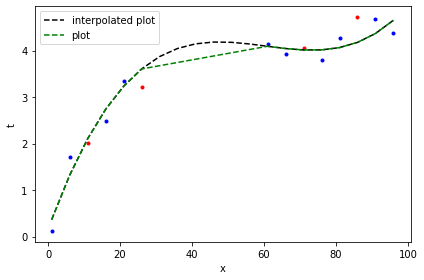

In [3]:
# Recompute the basis for the cubic model
polyorder = 3
PhiTrain = np.array([pow(xtrainval, j) for j in range(0, polyorder+1)]).transpose()
PhiTest = np.array([pow(xtest, j) for j in range(0, polyorder+1)]).transpose()
hiPhi = np.array([pow(x.flatten(), j) for j in range(0, polyorder+1)]).transpose()

# Solve the normal equations using a standard solver
w = np.linalg.solve(np.matmul(PhiTrain.transpose(), PhiTrain), np.matmul(PhiTrain.transpose(), ttrainval))

# Compute the estimated values of the data points so we can compute the error
ytrain = np.matmul(PhiTrain, w)
ytest = np.matmul(PhiTest, w)

# Compute the RMS error
training_loss = np.sqrt(np.sum(pow(ttrainval-ytrain, 2)/xtrainval.size))
test_loss = np.sqrt(np.sum(pow(ttest-ytest, 2)/xtest.size))
print(f"Training loss = {training_loss:.2f}")
print(f"Test loss = {test_loss:.2f}")

# Plot mle, interpolated for missing days mle plot
all_days = np.array(sorted([i for i in x.flatten()] + [31.0, 36.0, 41.0, 46.0, 51.0, 56.0]))
all_days_hiPhi = np.array([pow(all_days, j) for j in range(0, polyorder+1)]).transpose()
plotted_prediction = np.matmul(all_days_hiPhi, w)

plt.figure()
plt.plot(xtrainval, ttrainval, 'b.')
plt.plot(xtest, ttest, 'r.')
plt.plot(all_days, plotted_prediction, 'k--', label='interpolated plot')
plt.plot(x, np.matmul(hiPhi, w), 'g--', label='plot')
plt.xlabel('x')
plt.ylabel('t')
plt.tight_layout()
plt.legend()

# Print mle weights and f(x,w) values for each day including those which were missing
print()
for i, v in enumerate(w):
    print(f"Weight W{str(i)}: {v}")
print()
for i, v in enumerate(plotted_prediction):
    print(f"Day {all_days[i]}: {str(plotted_prediction[i])}")

## Question One Answers:

1. 
    Optimal degree of polynomial is $3$. We can see this is the case as it has the Total RMS validation and train score of $0.678$.
    The weight parameters for this order are (to three decimal places):

    * $w_{0} = 0.152$
    * $w_{1} = 0.216$
    * $w_{2} = -0.004$
    * $w_{3} = 2.062e-05$

2. 
    I have plotted the fitted line above (interpolated for missing days also). I think it does generalise well to unseen data, we can see this quantatively with Training Loss $= 0.24$ and Test Loss $= 0.34$ which are both fairly close together.

3. 
    Estimates for missing days are (to three decimal places):
    
    * Day 31:   $3.873$
    * Day 36:   $4.048$
    * Day 41:   $4.147$
    * Day 46:   $4.185$
    * Day 51:   $4.179$
    * Day 56:   $4.144$

# Question Two:
Compute the posterior distribution of the model parameters for the optimal model with all data points included. Assume a Gaussian Prior with mean $m_0=0$ and covariance $S_0 = \alpha^{−1} I$. Set $\alpha=2.0$.

1. 
    Compare the value of the mean of the posterior with your maximum likelihoood estimate.

2. 
    Comment on your finding.

3. 
    Under what circumstances would the maximum likelihood estimate be identical to the mean of the posterior? Verify that this is the case.

MLE:
Weight W0: 0.15163426198537774
Weight W1: 0.21627136501189054
Weight W2: -0.003743900264515951
Weight W3: 2.0622113515072508e-05

Posterior Weights:
Weight W0: 0.2259301462007709
Weight W1: 0.1835720943195279
Weight W2: -0.0029079879877977914
Weight W3: 1.5463412114129502e-05

mN Values:
Mean M0: 0.2397461013888602
Mean M1: 0.1960538466234063
Mean M2: -0.0032755673531949595
Mean M3: 1.7947238698728734e-05


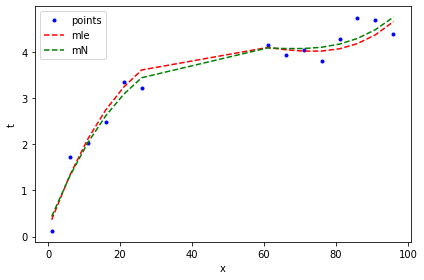

In [4]:
# Constants
wtrue = w
i = 0
N = 14
Npts = 14
sigma = 0.1
alpha = 2.0
beta = (1/sigma)**2

# Compute prior values matrix
m0 = np.zeros(wtrue.size)
S0 = (1/alpha)*np.eye(wtrue.size)

# Matrix of x^n values for 0 <= n <= 3
Phi = np.concatenate((np.ones((Npts, 1)), x, pow(x, 2), pow(x, 3)), axis=1)

# Random samples (of all points)
sample_indices = np.random.choice(np.linspace(0, Npts-1, Npts).astype(int), size=Npts, replace=False)
xsample = np.atleast_2d(x[sample_indices[0:N]])
tsample = np.atleast_2d(t.flatten()[sample_indices[0:N]]).T
Phisample = np.atleast_2d(Phi[sample_indices[0:N]])

# Compute parameters for posterior distribution
invS0 = alpha*np.eye(wtrue.size)
invSN = invS0 + beta*np.matmul(Phisample.T, Phisample)
SN = np.linalg.inv(invSN)
mN = np.squeeze(beta*np.matmul(SN, np.matmul(Phisample.T, tsample)))

# Compute posterior distribution
posterior = np.random.multivariate_normal(mean=mN, cov=SN)

# Plot points, means plot, mle plot (not interpolated)
mle = np.matmul(Phi, wtrue)
means = np.matmul(Phi, mN)
plt.figure()

#post = np.matmul(Phi,posterior)
#plt.plot(x,post,'c-.', label='posterior')

plt.plot(x, t, 'b.', label='points')
plt.plot(x, mle, 'r--', label='mle')
plt.plot(x, means, 'g--', label='mN')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.axis('auto')
plt.tight_layout()

# Print mle, posterior and mN weights
print("MLE:")
for i, v in enumerate(w):
    print(f"Weight W{str(i)}: {v}")
print()
print("Posterior Weights:")
for i, v in enumerate(posterior):
    print(f"Weight W{str(i)}: {v}")
print()
print("mN Values:")
for i, v in enumerate(mN):
    print(f"Mean M{str(i)}: {v}")

## Question Two Answers:

1. 
    The weights for the maximim likelihood estimate were (to three decimal places): 
    
    * $w_{0} = 0.152$
    * $w_{1} = 0.216$
    * $w_{2} = -0.004$
    * $w_{3} = 2.062e-05$
    
    The values for the mean of the posterior distribution ($m_{N}$) are (to three decimal places):
    
    * $m_{0} = 0.238$
    * $m_{1} = 0.196$
    * $m_{2} = -0.003$
    * $m_{3} = 1.795e-05$

2. 
    As we can see the values are fairly similar and both produce plots (mle vs mN plot on the graph above)

3. 
    *TODO: find this case*

# Question Three:

1. 
    Plot the uncertainty in your model's predictions.
2. 
    What happens if you try to predict $t$  in the future? Compute and plot the mean and uncertainty of the model prediction for up to day $120$. Comment on your result.

mN Values:
Mean M0: 0.2397461013888158
Mean M1: 0.19605384662341185
Mean M2: -0.003275567353195133
Mean M3: 1.7947238698728734e-05


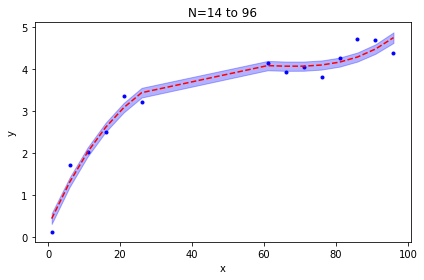

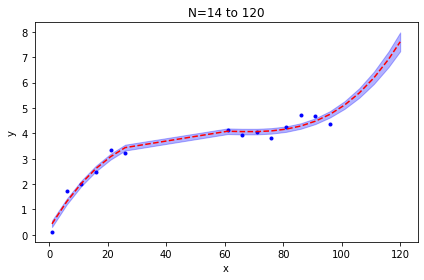

In [5]:
# Number of points
N = 14

# Allow up to polynomials of degree 3
nw = 4

# Create the model
Phi = np.array([pow(x.flatten(), j) for j in range(0, nw)]).transpose()

# Select 14 random points from the model
sample_indices = np.random.choice(np.linspace(0, N-1, N).astype(int), size=N, replace=False)

# Set up the initial state
alpha = 2.0
sigma = 0.1
beta = (1/sigma)**2
m0 = np.zeros(nw)
S0 = (1/alpha)*np.eye(nw)

for i, npts in enumerate([14]):

    # Random samples (of all points)
    xsample = np.atleast_2d(x.flatten()[sample_indices[0:npts]])
    tsample = np.atleast_2d(t.flatten()[sample_indices[0:npts]]).T
    Phisample = np.atleast_2d(Phi[sample_indices[0:npts]])

    # Compute parameters for posterior distribution
    invS0 = alpha*np.eye(nw)
    invSN = invS0 + beta*np.matmul(Phisample.T, Phisample)
    SN = np.linalg.inv(invSN)
    mN = np.squeeze(beta*np.matmul(SN, np.matmul(Phisample.T, tsample)))

    # Compute variance squared
    sigmasq = (1/beta) + np.diag(np.matmul(Phi, np.matmul(SN, Phi.T)))

    # Plot mean uncertainity for data
    plt.figure()
    plt.plot(np.squeeze(xsample), np.squeeze(tsample), 'b.')
    y = np.matmul(Phi, mN)
    plt.plot(x.flatten(), y, 'r--')
    plt.fill_between(x.flatten(), y-np.sqrt(sigmasq), y+np.sqrt(sigmasq), color='blue', alpha=0.3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'N={npts} to 96')
    plt.tight_layout()

    # Create model for up to 121 days
    all_days = np.array(sorted([i for i in x.flatten()] + [101.0, 106.0, 111.0, 116.0, 120.0]))
    all_days_hiPhi = np.array([pow(all_days, j) for j in range(0, 3+1)]).transpose()

    # Computer variance squared over 121 days
    sigmasq = (1/beta) + np.diag(np.matmul(all_days_hiPhi, np.matmul(SN, all_days_hiPhi.T)))

    # Plot mean uncertainity for data up to 121 days
    plt.figure()
    plt.plot(np.squeeze(xsample), np.squeeze(tsample), 'b.')
    y = np.matmul(all_days_hiPhi, mN)
    plt.plot(all_days, y, 'r--')
    plt.fill_between(all_days, y-np.sqrt(sigmasq), y+np.sqrt(sigmasq), color='blue', alpha=0.3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'N={npts} to 120')
    plt.tight_layout()

    # Print mN weights
    print("mN Values:")
    for i, v in enumerate(mN):
        print(f"Mean M{str(i)}: {v}")

## Question Three Answers:

1. 
    Plotted prediction for the $m_{N}$ posterior weights are above along with its uncertainity.

2. 
    Plotted prediction for the $m_{N}$ posterior weights are above along with its uncertainity through to day $120$.
    We can see that the model continutues its upwards trend at an increasing rate as it extrpolates past day $96$. Taking a sanity check on the context of the model, takings of a business after $x$ days, it is highly unlikely that a small business would in reality maintain this almost exponential growth trajectory. Furthermore, we can see that the range of uncertainty also seems to increase as we go past the domain of the data.
